**Importing Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [ ]:
data = pd.read_csv('/content/Unemployment in India.csv')
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
data.shape

(768, 7)

**Checking missing values:**

In [ ]:
data.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

**Checking duplicate values:**

In [ ]:
data.duplicated().sum()

27

**Quick summary of the dataset:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


* As we can see, we have a white spaces before the name of the columns and also we have Date column as object type

**Removing the whitespaces:**

In [ ]:
data.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data.columns

Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

**Converting date type:**

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

**Data exploration:**

In [ ]:
cat_var = data.select_dtypes(include = 'object')
print(f'We have {len(cat_var.columns)} categorical variables: \n{cat_var.columns}')

We have 3 categorical variables: 
Index(['Region', 'Frequency', 'Area'], dtype='object')


In [ ]:
cat_var.describe().T

,count,unique,top,freq
Region,740,28,Andhra Pradesh,28
Frequency,740,2,Monthly,381
Area,740,2,Urban,381


In [ ]:
num_var = data.select_dtypes(exclude = 'object')
print(f'We have {len(num_var.columns)} categorical variables: \n{num_var.columns}')

We have 4 categorical variables: 
Index(['Date', 'Estimated Unemployment Rate (%)', 'Estimated Employed',
       'Estimated Labour Participation Rate (%)'],
      dtype='object')


In [ ]:
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate (%),740.0,1.178795e+01,1.072130e+01,0.00,4.657500e+00,8.35,1.588750e+01,76.74
Estimated Employed,740.0,7.204460e+06,8.087988e+06,49420.00,1.190404e+06,4744178.50,1.127549e+07,45777509.00
Estimated Labour Participation Rate (%),740.0,4.263012e+01,8.111094e+00,13.33,3.806250e+01,41.16,4.550500e+01,72.57


**Dropping unwanted column:**

In [ ]:
data = data.drop('Frequency', axis = 1)
data.head(3)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural


# **Exploratory Data Analysis:**

**Finding outliers:**

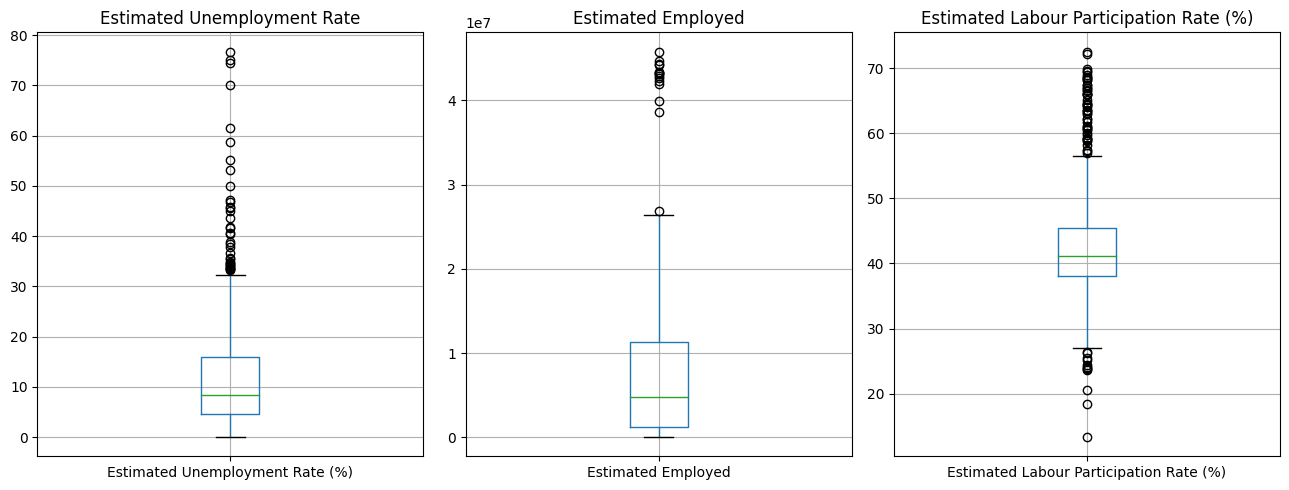

In [ ]:
plt.figure(figsize = (13, 5))


#subplot : 1
plt.subplot(131)
data.boxplot(column = 'Estimated Unemployment Rate (%)')
plt.title('Estimated Unemployment Rate')

#subplot : 2
plt.subplot(132)
data.boxplot(column = 'Estimated Employed')
plt.title('Estimated Employed')

#subplot : 3
plt.subplot(133)
data.boxplot(column = 'Estimated Labour Participation Rate (%)')
plt.title('Estimated Labour Participation Rate (%)')

plt.tight_layout()
plt.show()

**Corrolation plot:**

<Axes: >

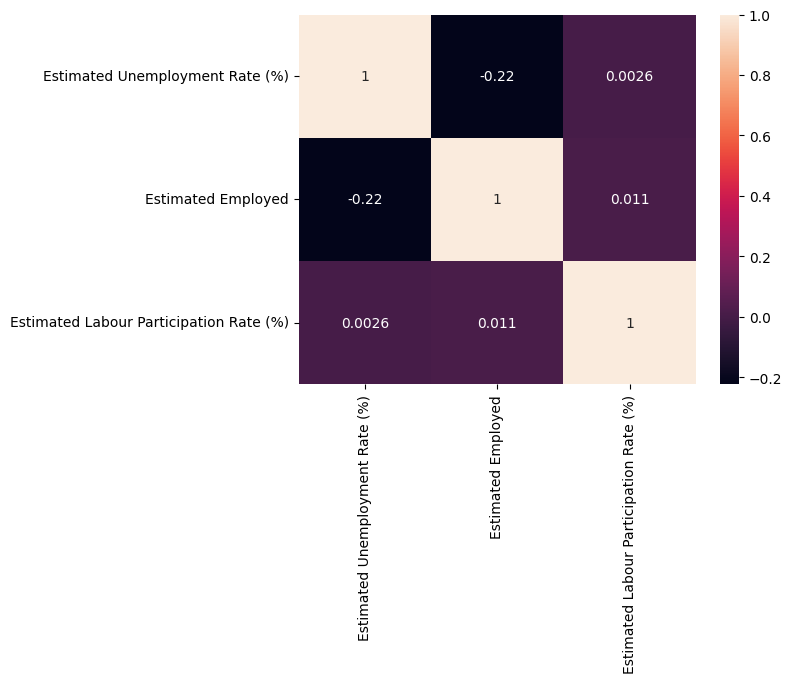

In [ ]:
sns.heatmap(data.corr(), annot = True)

**Pair plot:**

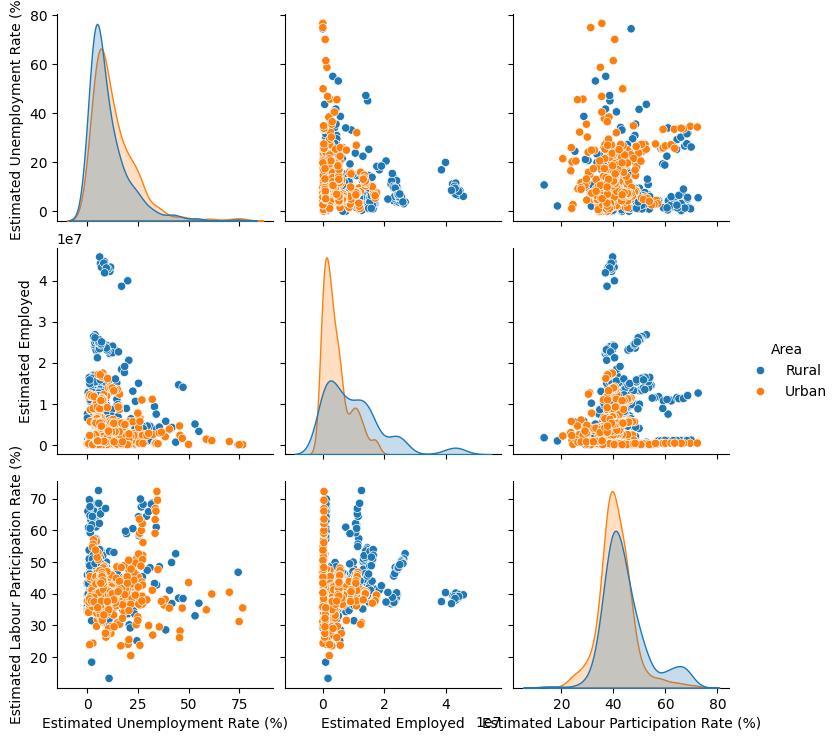

In [ ]:
sns.pairplot(data, hue = 'Area')

In [ ]:
data[['Estimated Unemployment Rate (%)', 'Region']].groupby('Region').mean().reset_index().head()

,Region,Estimated Unemployment Rate (%)
0,Andhra Pradesh,7.477143
1,Assam,6.428077
2,Bihar,18.918214
3,Chandigarh,15.991667
4,Chhattisgarh,9.240357


In [ ]:
unemployed_data = data[['Estimated Unemployment Rate (%)', 'Region']].groupby('Region').mean().reset_index()
unemployed_data = unemployed_data.sort_values(by = 'Estimated Unemployment Rate (%)', ascending = False)

px.bar(unemployed_data, x = 'Region', y = 'Estimated Unemployment Rate (%)', color = 'Region', title = 'Top states with higher unemployment rate')

* As we can see, **Tripura** has the highest unemployment rate.
* **Meghalaya** has the lowest unemployment rate.

In [ ]:
px.violin(data, x = 'Area', y = 'Estimated Unemployment Rate (%)', title = 'Rural v/s Urban Unemployment Distribution', box = True, points = 'all')

* When comparing Rural and Urban areas, **Urban** area has slightly high unemployment rate.

<Axes: xlabel='Date', ylabel='Estimated Unemployment Rate (%)'>

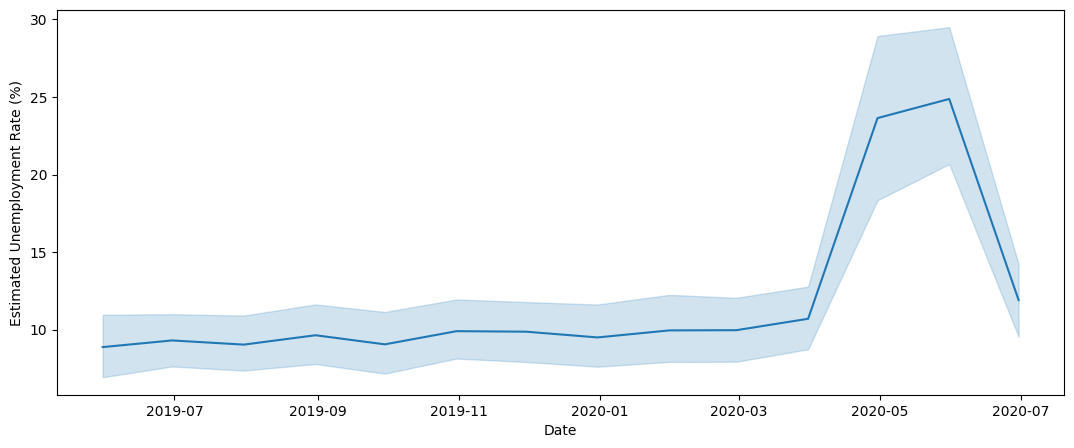

In [ ]:
plt.figure(figsize = (13, 5))
sns.lineplot(data = data, x = "Date", y = 'Estimated Unemployment Rate (%)')

* The peak that we see in the above plot, it is because of the covid 19 in India which started in march 2020.

**Percentage Change in Unemployment:**

In [ ]:
data['Month'] = data['Date'].dt.month
data.head(3)

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5.0
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6.0
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7.0


* "On the evening of 24 March 2020, the Government of India ordered a nationwide lockdown for 21 days, limiting the movement of the entire 1.38 billion (138 crores) population of India as a preventive measure against the COVID-19 pandemic in India".

* According to the news, we can filter the data into two parts

In [ ]:
data['Month'].unique()

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12.,  1.,  2.,  3.,  4., nan])

In [ ]:
#Filter data for months 1 to 3 (before lockdown)
bef_loc = data[(data['Month'] >= 1) & (data['Month'] <= 3)][['Region', 'Estimated Unemployment Rate (%)']]

#Filtering data for months 4 to 12 (after lockdown)
after_loc = data[(data['Month'] > 3) & (data['Month'] <= 12)][['Region', 'Estimated Unemployment Rate (%)']]

In [ ]:
bef_loc = bef_loc.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns =
 {'Estimated Unemployment Rate (%)' : 'Unemployment Rate before Lock-down'})

In [ ]:
after_loc = after_loc.groupby('Region')['Estimated Unemployment Rate (%)'].mean().reset_index().rename(columns =
 {'Estimated Unemployment Rate (%)' : 'Unemployment Rate after Lock-down'})

In [ ]:
bef_loc['Percentage change in Unemployment'] = round(after_loc['Unemployment Rate after Lock-down'] - bef_loc['Unemployment Rate before Lock-down']) / bef_loc['Unemployment Rate before Lock-down'] * 100

In [ ]:
bef_loc = bef_loc.sort_values( by = 'Percentage change in Unemployment', ascending = False)

<Axes: xlabel='Percentage change in Unemployment', ylabel='Region'>

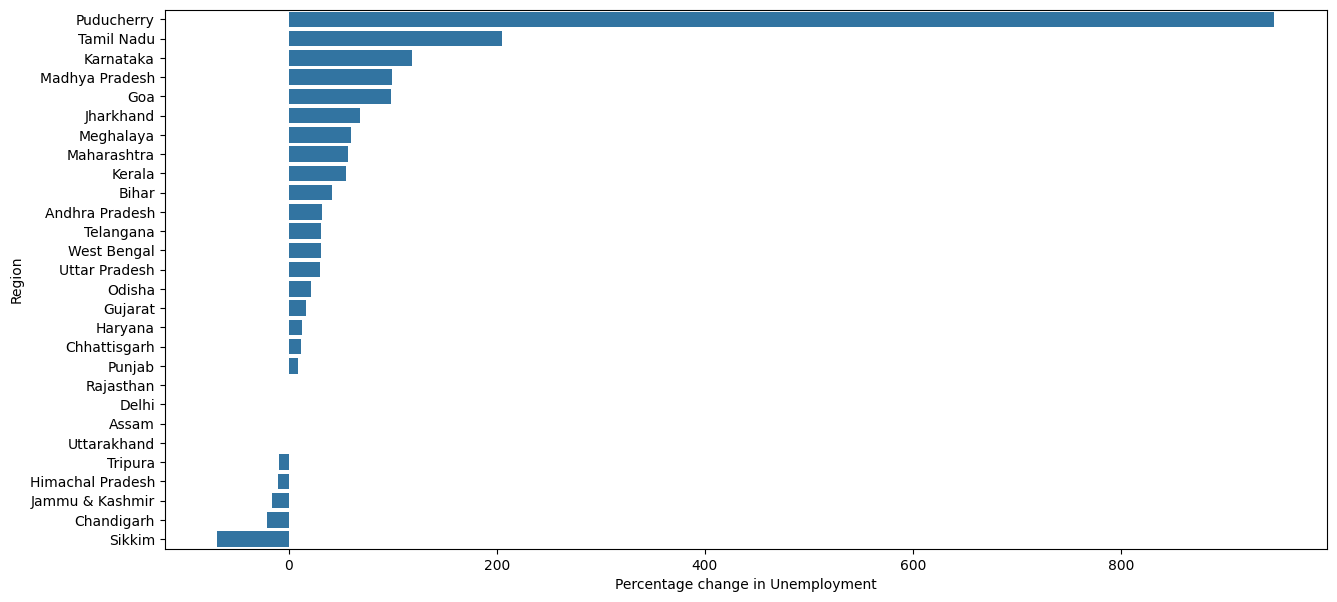

In [ ]:
plt.figure(figsize = (15, 7))
sns.barplot(data = bef_loc, x = 'Percentage change in Unemployment', y = 'Region')

* From the above plot, we can clearly see that, Tripura, Himachal Pradesh, Jammu & Kashmir, Chandigarh, Sikkim are not much impacted by the lockdown.

* State Puduchery is highly impacted by the lock-down.

* A larger percentage change suggests a more substantial shift in unemployment rates compared to a smaller percentage change.